In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score



# Questions and Answers:
#### 1. Data cleaning?
- there were just 1-2 null values which I handled by dropping them
- I dropped irrelevant columns such as 'nameOrig', 'nameDest', 'isFlaggedFraud'


#### 2. Describe your fraud detection model in elaboration
- I used 2 models: Decision Trees and Random Forest for the fraud detection
- X consisted of step	amount	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest	errorBalanceOrig	errorBalanceDest	HourOfDay	DayOfWeek columns. While Y consisted of isFraud column
- I used trainX and trainY for model training, using 70-30 as the split ratio for my train and test data respectively.
- Random Forest Score:  99.9106664284438
- Decision Tree Score:Decison Tree Score: 99.9702221428146


#### 3. How did you select variables to be included in the model?
- X consisted of step	amount	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest	errorBalanceOrig	errorBalanceDest	HourOfDay	DayOfWeek columns.
- Y consisted of isFraud column
- trainX and testX were divided in 7:3 ratio from X dataframe
- same split ratio for testX and testY


#### 4. Demonstrate the performance of the model by using best set of tools.
- Random Forest Score:  99.9106664284438
- Decision Tree Score:Decison Tree Score: 99.9702221428146


#### 5. What are the key factors that predict fraudulent customer?
- Old vs. New Balance: Significant changes in account balances.
- Unusual high amount trasactions can be fraud.
- Payment type - Transfer & CashOuts


#### 6. Do these factors make sense? If yes, How? If not, How not?
- Yes, sudden significant change indicate the chances of fraud
- Fraudulent transactions often involve large amounts of money to maximize the impact before the fraud is detected.
- Frauds try to control the customers accounts or try to empty the funds by transferring to another account and then cashing out of the system, hence yes Transfers and CashOuts happens often in fraud transactions.


#### 7. What kind of prevention should be adopted while company update its infrastructure?
- Multiple Authentication steps before transactions
- Don't share sensitive information to suspicious SMS/Mails/Calls
- use secured network
- use reliable websites
- periodic password change

#### 8. Assuming these actions have been implemented, how would you determine if they work?
- checking transaction log
- checking account activities regularly

In [3]:
df = pd.read_csv("Fraud (2).csv")

### EDA

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
138111,11,TRANSFER,1023642.86,C1959247934,144636.00,0.00,C1219349215,5430.52,0.00,0.0,0.0
138112,11,CASH_OUT,110828.64,C2063932957,372369.43,261540.78,C1582808814,462640.85,832488.91,0.0,0.0
138113,11,CASH_OUT,168177.59,C850779719,261540.78,93363.19,C209813603,201463.66,550170.95,0.0,0.0
138114,11,CASH_OUT,345671.65,C1697243396,93363.19,0.00,C224342296,3011784.96,3468735.55,0.0,0.0


In [5]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8932,7,CASH_IN,76185.26,C549417478,4537.00,80722.26,C1454226183,188.00,0.00,0.0,0.0
119569,11,CASH_IN,80860.78,C259210542,1576544.27,1657405.05,C138078568,422765.80,341905.02,0.0,0.0
103950,10,TRANSFER,1574745.69,C2091176814,6155.00,0.00,C588482337,1604150.60,3725712.56,0.0,0.0
80144,10,CASH_OUT,483.27,C947697,305.00,0.00,C1354725727,9830750.42,9763043.92,0.0,0.0
47759,9,CASH_IN,30746.23,C362975515,1465.00,32211.23,C193270934,1570138.43,1511488.28,0.0,0.0
99329,10,TRANSFER,702989.59,C1851617744,0.00,0.00,C530216580,4231767.37,5451348.04,0.0,0.0
127513,11,PAYMENT,7781.86,C252923141,52326.00,44544.14,M1356643875,0.00,0.00,0.0,0.0
53436,9,CASH_OUT,353378.36,C589090542,20683.00,0.00,C1065443868,102502.65,84817.94,0.0,0.0
39873,9,PAYMENT,3541.88,C1570390822,0.00,0.00,M672232333,0.00,0.00,0.0,0.0
100944,10,CASH_IN,88010.41,C1753338445,36627.00,124637.41,C1794068152,824610.45,521983.14,0.0,0.0


In [6]:
df.shape

(138116, 11)

In [7]:
# Display the different types of transactions of the TYPE field
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C850779719',
       'C1697243396', 'C790956975'], dtype=object)

In [9]:
dfFraudPayment = df.loc[(df.isFraud == 1) & (df.type == 'PAYMENT')]
dfTotalPayment = df.loc[(df.type == 'PAYMENT')]

In [10]:
print("Number of fraudulent PAYMENTs = ", len(dfFraudPayment))
print("Number of non-fraudulent PAYMENTs = ", len(dfTotalPayment)-len(dfFraudPayment))
#print("Number of non-fraudulent PAYMENTs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'PAYMENT')]))

Number of fraudulent PAYMENTs =  0
Number of non-fraudulent PAYMENTs =  52865


In [11]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfTotalTransfer = df.loc[(df.type == 'TRANSFER')]

print("Number of fraudulent TRANSFERs = ", len(dfFraudTransfer))
print("Number of non-fraudulent TRANSFERs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'TRANSFER')]))

Number of fraudulent TRANSFERs =  60
Number of non-fraudulent TRANSFERs =  11652


In [12]:
dfFraudCashOut = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
dfTotalCashOut = df.loc[(df.type == 'CASH_OUT')]

print("Number of fraudulent CASH_OUTs = ", len(dfFraudCashOut))
print("Number of non-fraudulent CASH_OUTs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'CASH_OUT')]))


Number of fraudulent CASH_OUTs =  62
Number of non-fraudulent CASH_OUTs =  44193


In [13]:
dfFraudDebit = df.loc[(df.isFraud == 1) & (df.type == 'DEBIT')]
dfTotalDebit = df.loc[(df.type == 'DEBIT')]

print("Number of fraudulent DEBITs = ", len(dfFraudDebit))
print("Number of non-fraudulent DEBITs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'DEBIT')]))


Number of fraudulent DEBITs =  0
Number of non-fraudulent DEBITs =  1286


In [14]:
dfFraudCashIn = df.loc[(df.isFraud == 1) & (df.type == 'CASH_IN')]
dfTotalCashIn = df.loc[(df.type == 'CASH_IN')]

print("Number of fraudulent CASH_INs = ", len(dfFraudCashIn))
print("Number of fraudulent CASH_INs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'CASH_IN')]))


Number of fraudulent CASH_INs =  0
Number of fraudulent CASH_INs =  27997


In [15]:
fraudTrans = (len(df['isFraud'].loc[(df.isFraud == 1)]))
print("total fraud transactions:", fraudTrans)

total fraud transactions: 122


conclusion: the fraudulent payments occurs only in the cases of TRANSFERS and CASH-OUTS

### data preprocessing

In [18]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,138115


In [19]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,137993
1.0,122


In [20]:
dfFlagged = df.loc[df.isFraud == 1]

In [21]:
dfFlagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
102181,10,CASH_OUT,2662734.59,C813115168,2662734.59,0.0,C401825929,14165.62,2930405.33,1.0,0.0
102607,10,TRANSFER,9217.19,C184586799,9217.19,0.0,C812377986,0.00,96795.60,1.0,0.0
102608,10,CASH_OUT,9217.19,C1105700111,9217.19,0.0,C1767952032,0.00,9217.19,1.0,0.0
136419,11,TRANSFER,2100.00,C785601242,2100.00,0.0,C1576053316,0.00,0.00,1.0,0.0


In [22]:
print(len(dfFlagged))

122


### data cleaning

In [67]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [68]:
df.dropna(inplace=True)

In [23]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
# Drop irrelevant columns
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

Y = X['isFraud']

since the fraudulent transactions occur only in TRANSFER and CASH-OUTS, so we are just include those in X dataframe

In [24]:
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

# Converting tje X.type dtype column from string to int
X.type = X.type.astype(int)

X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.00,0.00,0.00,1.0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1.0
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44,0.0
19,1,0,215310.30,705.00,0.00,22425.00,0.00,0.0
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89,0.0
...,...,...,...,...,...,...,...,...
138111,11,0,1023642.86,144636.00,0.00,5430.52,0.00,0.0
138112,11,1,110828.64,372369.43,261540.78,462640.85,832488.91,0.0
138113,11,1,168177.59,261540.78,93363.19,201463.66,550170.95,0.0
138114,11,1,345671.65,93363.19,0.00,3011784.96,3468735.55,0.0


In [25]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]

In [26]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), ['oldbalanceDest', 'newbalanceDest']] = - 1
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.00,-1.00,-1.00,1.0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1.0
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44,0.0
19,1,0,215310.30,705.00,0.00,22425.00,0.00,0.0
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89,0.0
...,...,...,...,...,...,...,...,...
138111,11,0,1023642.86,144636.00,0.00,5430.52,0.00,0.0
138112,11,1,110828.64,372369.43,261540.78,462640.85,832488.91,0.0
138113,11,1,168177.59,261540.78,93363.19,201463.66,550170.95,0.0
138114,11,1,345671.65,93363.19,0.00,3011784.96,3468735.55,0.0


In [27]:
print("There are {} legit transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.\n"\
      .format(len(X.loc[(X.oldbalanceOrg == 0.0) & (X.newbalanceOrig == 0) & (X.isFraud == 0)])))

print("There are {} fraud transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud."\
      .format(len(X.loc[(X.oldbalanceOrg == 0.0) & (X.newbalanceOrig == 0) & (X.isFraud == 1)])))

There are 27930 legit transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.

There are 4 fraud transactions when oldbalanceOrg and newbalanceOrg are 0 and there is no fraud.


### Feature Engg

In [28]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.00,-1.00,-1.00,1.0,0.00,181.00
3,1,1,181.00,181.00,0.00,21182.00,0.00,1.0,0.00,21363.00
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44,0.0,213808.94,182703.50
19,1,0,215310.30,705.00,0.00,22425.00,0.00,0.0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89,0.0,300850.89,-2401220.00
...,...,...,...,...,...,...,...,...,...,...
138111,11,0,1023642.86,144636.00,0.00,5430.52,0.00,0.0,879006.86,1029073.38
138112,11,1,110828.64,372369.43,261540.78,462640.85,832488.91,0.0,-0.01,-259019.42
138113,11,1,168177.59,261540.78,93363.19,201463.66,550170.95,0.0,0.00,-180529.70
138114,11,1,345671.65,93363.19,0.00,3011784.96,3468735.55,0.0,252308.46,-111278.94


### Visualizations

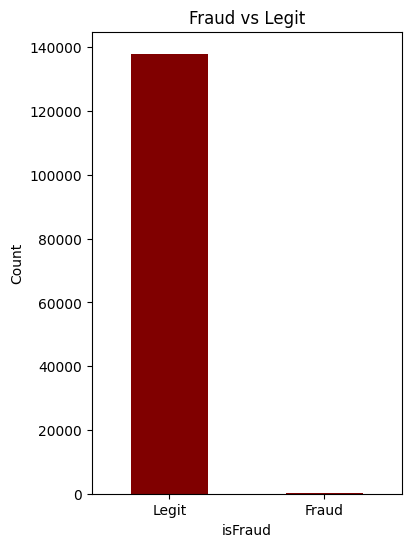

In [16]:
# NUMBER OF LEGIT AND FRAUD TRANSACTIONS
plt.figure(figsize=(4,6))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0, color='maroon')
plt.title("Fraud vs Legit")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

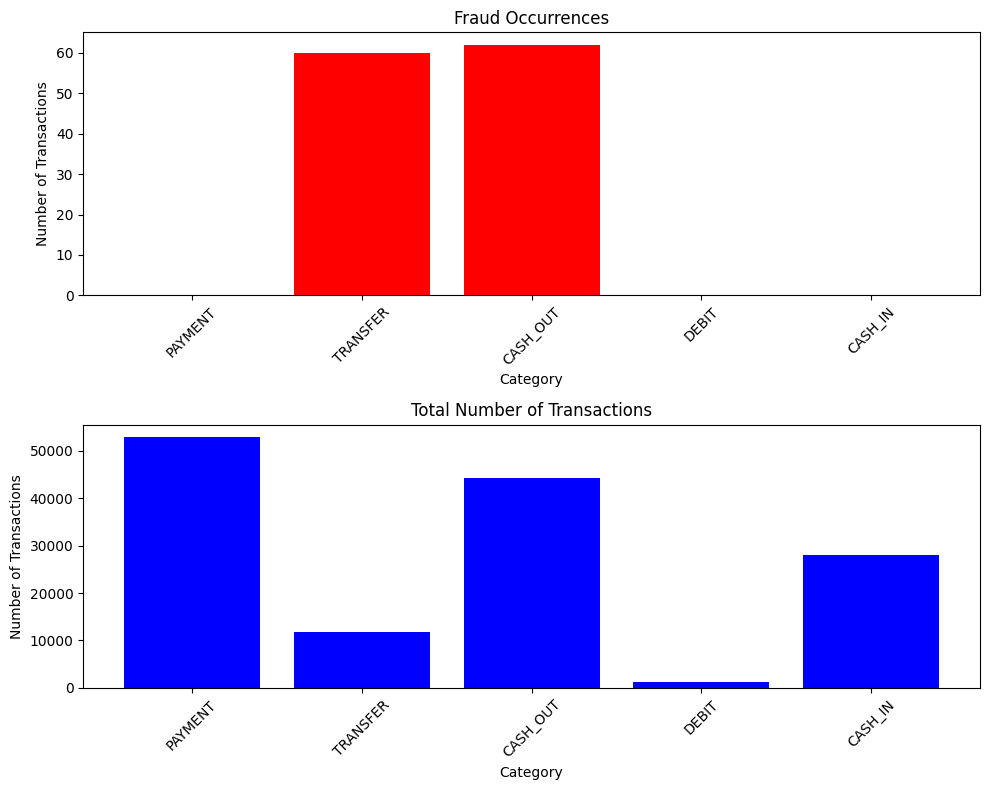

In [17]:
total = [len(dfTotalPayment), len(dfTotalTransfer), len(dfTotalCashOut), len(dfTotalDebit), len(dfTotalCashIn)]
fraud = [len(dfFraudPayment), len(dfFraudTransfer), len(dfFraudCashOut), len(dfFraudDebit), len(dfFraudCashIn)]
names = ["PAYMENT", "TRANSFER", "CASH_OUT", "DEBIT", "CASH_IN"]


fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].bar(names, fraud, color='red')
axs[0].set_title("Fraud Occurrences")
axs[0].set_ylabel("Number of Transactions")
axs[0].set_xlabel("Category")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(names, total, color='blue')
axs[1].set_title("Total Number of Transactions")
axs[1].set_ylabel("Number of Transactions")
axs[1].set_xlabel("Category")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



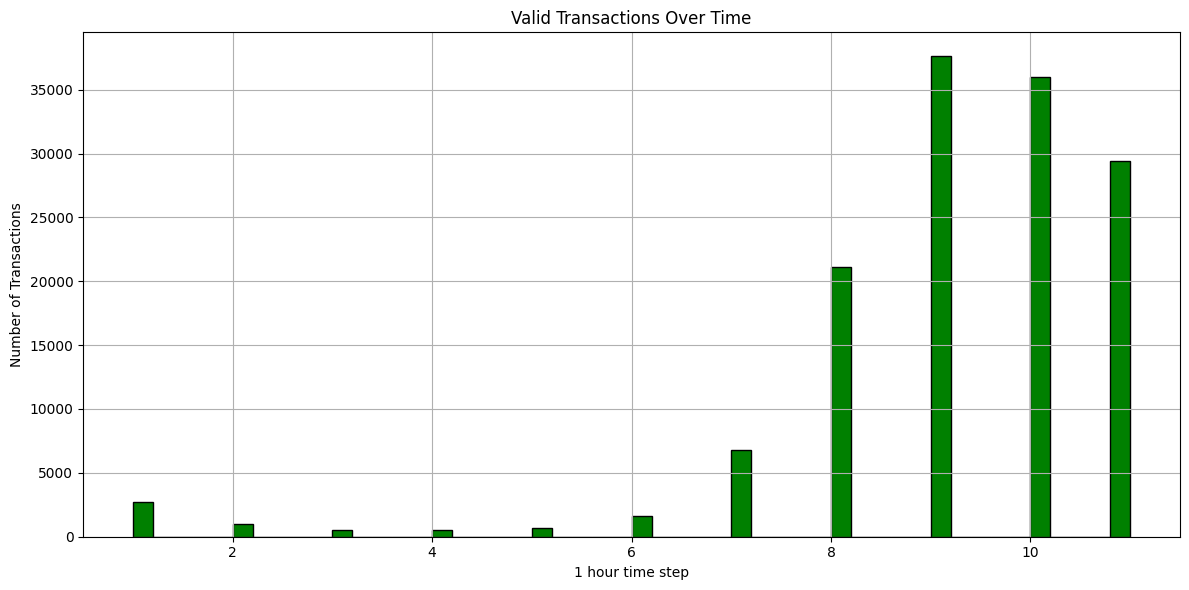

In [29]:

genuine = df[df["isFraud"] == 0].drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

plt.figure(figsize=(12, 6))
bins = 50
genuine['step'].hist(color='green', bins=bins, edgecolor='black')

plt.xlabel('1 hour time step')
plt.ylabel('Number of Transactions')
plt.title('Valid Transactions Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


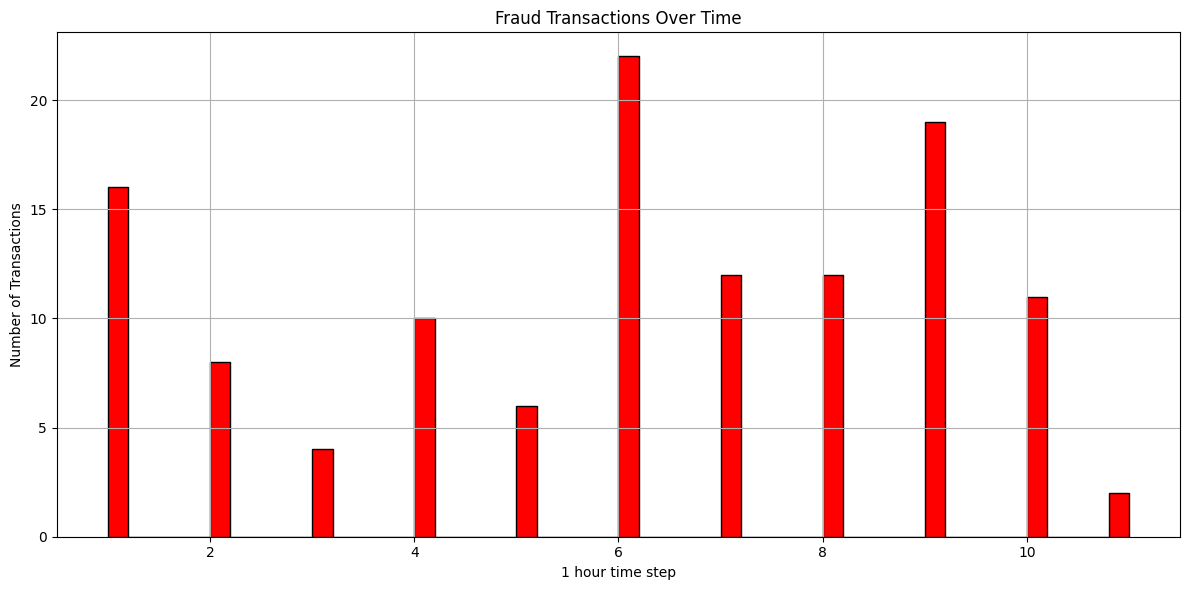

In [30]:
fraudulent = df[df["isFraud"] == 1].drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

plt.figure(figsize=(12, 6))
bins = 50
fraudulent['step'].hist(color='red', bins=bins, edgecolor='black')

plt.xlabel('1 hour time step')
plt.ylabel('Number of Transactions')
plt.title('Fraud Transactions Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# Get the transaction hour and day of transaction
X["HourOfDay"] = X.step % 24  # Calculate hour
X["DayOfWeek"] = X.step % 7   # Calculate day of week
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
2,1,0,181.00,181.00,0.00,-1.00,-1.00,1.0,0.00,181.00,1,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1.0,0.00,21363.00,1,1
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44,0.0,213808.94,182703.50,1,1
19,1,0,215310.30,705.00,0.00,22425.00,0.00,0.0,214605.30,237735.30,1,1
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89,0.0,300850.89,-2401220.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
138111,11,0,1023642.86,144636.00,0.00,5430.52,0.00,0.0,879006.86,1029073.38,11,4
138112,11,1,110828.64,372369.43,261540.78,462640.85,832488.91,0.0,-0.01,-259019.42,11,4
138113,11,1,168177.59,261540.78,93363.19,201463.66,550170.95,0.0,0.00,-180529.70,11,4
138114,11,1,345671.65,93363.19,0.00,3011784.96,3468735.55,0.0,252308.46,-111278.94,11,4


In [32]:
X.tail(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
138099,11,1,168260.35,81976.00,0.00,1392800.91,1752910.96,0.0,86284.35,-191849.70,11,4
138100,11,1,430379.12,0.00,0.00,715295.85,892147.79,0.0,430379.12,253527.18,11,4
138103,11,1,12698.38,11632.00,0.00,170437.05,0.00,0.0,1066.38,183135.43,11,4
138104,11,0,707890.18,69499.00,0.00,1031.00,613345.73,0.0,638391.18,95575.45,11,4
138110,11,0,436567.82,12007.00,0.00,58887.10,495454.93,0.0,424560.82,-0.01,11,4
138111,11,0,1023642.86,144636.00,0.00,5430.52,0.00,0.0,879006.86,1029073.38,11,4
138112,11,1,110828.64,372369.43,261540.78,462640.85,832488.91,0.0,-0.01,-259019.42,11,4
138113,11,1,168177.59,261540.78,93363.19,201463.66,550170.95,0.0,0.00,-180529.70,11,4
138114,11,1,345671.65,93363.19,0.00,3011784.96,3468735.55,0.0,252308.46,-111278.94,11,4
138115,11,1,175087.49,0.00,0.00,NaN,NaN,NaN,175087.49,NaN,11,4


In [33]:
# Remove irrelevant column
X = X.drop(['type'], axis = 1)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
2,1,181.00,181.00,0.00,-1.00,-1.00,1.0,0.00,181.00,1,1
3,1,181.00,181.00,0.00,21182.00,0.00,1.0,0.00,21363.00,1,1
15,1,229133.94,15325.00,0.00,5083.00,51513.44,0.0,213808.94,182703.50,1,1
19,1,215310.30,705.00,0.00,22425.00,0.00,0.0,214605.30,237735.30,1,1
24,1,311685.89,10835.00,0.00,6267.00,2719172.89,0.0,300850.89,-2401220.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...
138111,11,1023642.86,144636.00,0.00,5430.52,0.00,0.0,879006.86,1029073.38,11,4
138112,11,110828.64,372369.43,261540.78,462640.85,832488.91,0.0,-0.01,-259019.42,11,4
138113,11,168177.59,261540.78,93363.19,201463.66,550170.95,0.0,0.00,-180529.70,11,4
138114,11,345671.65,93363.19,0.00,3011784.96,3468735.55,0.0,252308.46,-111278.94,11,4


In [34]:

X.to_csv('cleaned data.csv')


### importing the clean data


In [38]:
data = pd.read_csv("cleaned data.csv")
data.dropna(inplace=True)

In [39]:
data

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
0,2,1,181.00,181.00,0.00,-1.00,-1.00,1.0,0.00,181.00,1,1
1,3,1,181.00,181.00,0.00,21182.00,0.00,1.0,0.00,21363.00,1,1
2,15,1,229133.94,15325.00,0.00,5083.00,51513.44,0.0,213808.94,182703.50,1,1
3,19,1,215310.30,705.00,0.00,22425.00,0.00,0.0,214605.30,237735.30,1,1
4,24,1,311685.89,10835.00,0.00,6267.00,2719172.89,0.0,300850.89,-2401220.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
55962,138110,11,436567.82,12007.00,0.00,58887.10,495454.93,0.0,424560.82,-0.01,11,4
55963,138111,11,1023642.86,144636.00,0.00,5430.52,0.00,0.0,879006.86,1029073.38,11,4
55964,138112,11,110828.64,372369.43,261540.78,462640.85,832488.91,0.0,-0.01,-259019.42,11,4
55965,138113,11,168177.59,261540.78,93363.19,201463.66,550170.95,0.0,0.00,-180529.70,11,4


In [40]:
X = data.drop(['isFraud'], axis = 1)
Y = data['isFraud']

In [41]:
Y[Y.isna()==True]

,isFraud


In [42]:
print(X.shape)
print(Y.shape)

(55967, 11)
(55967,)


In [44]:
data.head(10)

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,HourOfDay,DayOfWeek
0,2,1,181.00,181.00,0.0,-1.0,-1.00,1.0,0.00,181.00,1,1
1,3,1,181.00,181.00,0.0,21182.0,0.00,1.0,0.00,21363.00,1,1
2,15,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0,213808.94,182703.50,1,1
3,19,1,215310.30,705.00,0.0,22425.0,0.00,0.0,214605.30,237735.30,1,1
4,24,1,311685.89,10835.00,0.0,6267.0,2719172.89,0.0,300850.89,-2401220.00,1,1
5,42,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0,83569.30,396799.55,1,1
6,47,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0,55011.88,63100.72,1,1
7,48,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0,5346.89,-5795447.02,1,1
8,51,1,23261.30,20411.53,0.0,25742.0,0.00,0.0,2849.77,49003.30,1,1
9,58,1,62610.80,79114.00,16503.2,517.0,8383.29,0.0,0.00,54744.51,1,1


In [43]:
# Details about the dataset
pos, neg = np.bincount(Y)
total = neg + pos
print("Total transactions:", total,"\n")
print("Genuine transactions", pos, "(", round((pos * 100 / total), 2), "%)\n")
print("Fraudulent transactions:", neg, "(", round((neg * 100 / total), 2), "%)\n")

Total transactions: 55967 

Genuine transactions 55845 ( 99.78 %)

Fraudulent transactions: 122 ( 0.22 %)



In [72]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,  average_precision_score


In [45]:
# Split the data into 70% training and 30% testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 5)

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(bootstrap = True, max_depth = 100, max_features = 2,
                                min_samples_leaf = 3, min_samples_split = 10, n_estimators = 200,
                                random_state = 10, verbose = 1, class_weight = "balanced")
# Train model with train data
forest.fit(trainX, trainY)

# Test model's predictions with test data
y_pred = forest.predict(testX)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s


In [59]:
forest_score = forest.score(testX, testY) * 100

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


In [60]:
print("Random Forest Score: ", forest_score)

Random Forest Score:  99.9106664284438


In [62]:
print("Random Forest Confusion Matrix:")
cm=confusion_matrix(testY, y_pred)
print(cm)

Random Forest Confusion Matrix:
[[16736     0]
 [   15    40]]


### Decision Trees


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(trainX, trainY)

Y_pred_dt = decision_tree.predict(testX)
decision_tree_score = decision_tree.score(testX, testY) * 100

In [55]:
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.9702221428146


In [63]:
print("Decision Tree Confusion Matrix:")
cm=confusion_matrix(testY, Y_pred_dt)
print(cm)

Decision Tree Confusion Matrix:
[[16734     2]
 [    3    52]]


### summary-

In [65]:
from sklearn.metrics import classification_report
dt_cf= classification_report(testY, Y_pred_dt)
print(dt_cf)
rf_cf= classification_report(testY, y_pred)
print(rf_cf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16736
         1.0       0.96      0.95      0.95        55

    accuracy                           1.00     16791
   macro avg       0.98      0.97      0.98     16791
weighted avg       1.00      1.00      1.00     16791

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16736
         1.0       1.00      0.73      0.84        55

    accuracy                           1.00     16791
   macro avg       1.00      0.86      0.92     16791
weighted avg       1.00      1.00      1.00     16791

